In [ ]:
!pip install ultralytics

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image
import ultralytics

from ultralytics import YOLO

ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
train_images_path = '/content/drive/MyDrive/cards1/train'
valid_images_path = '/content/drive/MyDrive/cards1/valid'
test_images_path = '/content/drive/MyDrive/cards1/test'


In [ ]:
import os

# Define paths to each dataset split
dataset_splits = {
    'train': '/content/drive/MyDrive/cards1/train',
    'valid': '/content/drive/MyDrive/cards1/valid',
    'test': '/content/drive/MyDrive/cards1/test'
}

# Loop through each dataset split
for split_name, root_folder in dataset_splits.items():
    print(f"Processing {split_name} dataset...")

    # Map folder names (classes) to class IDs
    class_mapping = {folder: idx for idx, folder in enumerate(os.listdir(root_folder))}

    # Generate label files with dummy bounding boxes
    for class_name, class_id in class_mapping.items():
        class_folder = os.path.join(root_folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            if filename.endswith('.jpg'):  # Adjust if using a different image format
                # Define the path for the label file
                label_filename = filename.replace('.jpg', '.txt')
                label_path = os.path.join(class_folder, label_filename)

                # Write the class ID and dummy bounding box values to the label file
                with open(label_path, 'w') as label_file:
                    label_file.write(f"{class_id} 0.5 0.5 1.0 1.0\n")  # Dummy bounding box

    print(f"Label files for {split_name} dataset generated successfully.")

print("All label files generated across train, valid, and test datasets.")

Processing train dataset...
Label files for train dataset generated successfully.
Processing valid dataset...
Label files for valid dataset generated successfully.
Processing test dataset...
Label files for test dataset generated successfully.
All label files generated across train, valid, and test datasets.


In [ ]:
import cv2
import os

def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocesses an image for model training.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): The desired (width, height) for resizing the image.

    Returns:
        numpy.ndarray: The preprocessed image, resized and normalized.
    """

    # Load the image from the specified path
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None

    # Resize the image to the target dimensions specified (default is 224x224)
    image = cv2.resize(image, target_size)

    # Normalize the pixel values to the range [0, 1] by dividing by 255.0
    # This helps the model train more effectively by standardizing the input
    image = image / 255.0

    # Return the preprocessed image
    return image

In [ ]:
import cv2
import os

def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocesses an image for model training.

    Args:
        image_path (str): The path to the image file.
        target_size (tuple): The desired (width, height) for resizing the image.

    Returns:
        numpy.ndarray: The preprocessed image, resized and normalized.
    """

    # Load the image from the specified path
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None

    # Resize the image to the target dimensions specified (default is 224x224)
    image = cv2.resize(image, target_size)

    # Normalize the pixel values to the range [0, 1] by dividing by 255.0
    # This helps the model train more effectively by standardizing the input
    image = image / 255.0

    # Return the preprocessed image
    return image

In [ ]:
def preprocess_dataset(image_folder, label_folder, target_size=(224, 224)):
    images = []
    bboxes = []  # Bounding boxes and classes

    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):  # Adjust if your images have a different extension
            # Process image
            image_path = os.path.join(image_folder, filename)
            image = preprocess_image(image_path, target_size)
            if image is None:
                continue
            images.append(image)

            # Process labels
            label_path = os.path.join(label_folder, filename.replace('.jpg', '.txt'))
            if os.path.exists(label_path):
                labels = load_labels(label_path)
                bboxes.append(labels)
            else:
                print(f"Label file not found for {filename}, skipping labels.")
                bboxes.append([])  # No labels for this image

    return np.array(images), bboxes


In [ ]:
import os

# Define paths
image_root_folder = '/content/drive/MyDrive/cards1/train'
label_root_folder = '/content/drive/MyDrive/cards1/train'

# Map folder names (classes) to class IDs
class_mapping = {folder: idx for idx, folder in enumerate(os.listdir(image_root_folder))}

# Generate label files with dummy bounding boxes
for class_name, class_id in class_mapping.items():
    class_folder = os.path.join(image_root_folder, class_name)
    if not os.path.isdir(class_folder):
        continue

    for filename in os.listdir(class_folder):
        if filename.endswith('.jpg'):  # Assuming images are in .jpg format
            # Define the path for the label file
            label_filename = filename.replace('.jpg', '.txt')
            label_path = os.path.join(class_folder, label_filename)

            # Write the class ID and dummy bounding box values to the label file
            with open(label_path, 'w') as label_file:
                label_file.write(f"{class_id} 0.5 0.5 1.0 1.0\n")  # Dummy bounding box

print("Label files with dummy bounding boxes generated successfully.")

Label files with dummy bounding boxes generated successfully.


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model with the generated labels
results = model.train(data='/content/drive/MyDrive/cards1/data.yaml', epochs=30, imgsz=224, batch=32, name='card_identification',half=True)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/cards1/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=card_identification9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/cards1/train/ace of clubs.cache... 2650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2650/2650 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/cards1/valid/ace of clubs.cache... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:00<?, ?it/s]

Plotting labels to runs/detect/card_identification9/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000175, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/card_identification9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.8082      4.508      1.255         75        224: 100%|██████████| 83/83 [05:18<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.19s/it]

                   all        265        265          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.3383      4.088     0.9952         67        224: 100%|██████████| 83/83 [05:10<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  3.00s/it]

                   all        265        265     0.0135      0.306     0.0377     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G     0.2808       3.71     0.9618         87        224: 100%|██████████| 83/83 [05:06<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        265        265     0.0177      0.536     0.0424     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G     0.2684      3.279     0.9534         84        224: 100%|██████████| 83/83 [05:06<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]

                   all        265        265     0.0171      0.498     0.0434     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      0.257      2.946      0.946         76        224: 100%|██████████| 83/83 [05:06<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]

                   all        265        265     0.0181      0.551     0.0363     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G     0.2333      2.711     0.9412         76        224: 100%|██████████| 83/83 [05:06<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]

                   all        265        265     0.0166      0.668     0.0346     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.2226      2.548     0.9323         80        224: 100%|██████████| 83/83 [05:09<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        265        265     0.0179      0.608     0.0335     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.2174      2.419     0.9317         83        224: 100%|██████████| 83/83 [05:05<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]

                   all        265        265     0.0167      0.611     0.0342     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G       0.21      2.302     0.9278         84        224: 100%|██████████| 83/83 [05:09<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        265        265     0.0187      0.683     0.0334     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      0.199      2.208     0.9257         88        224: 100%|██████████| 83/83 [05:05<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]

                   all        265        265     0.0172      0.634     0.0288     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.1947      2.139     0.9232         78        224: 100%|██████████| 83/83 [05:06<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]

                   all        265        265     0.0156      0.713     0.0279     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.1855      2.077     0.9219         72        224: 100%|██████████| 83/83 [05:06<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.19s/it]

                   all        265        265      0.016       0.66     0.0314     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.1789      2.029     0.9208         86        224: 100%|██████████| 83/83 [05:13<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]

                   all        265        265     0.0163      0.596     0.0278     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.1805      1.974     0.9231         76        224: 100%|██████████| 83/83 [05:13<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]

                   all        265        265     0.0158      0.645     0.0301     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.1756      1.932     0.9181         75        224: 100%|██████████| 83/83 [05:08<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]

                   all        265        265     0.0143      0.623     0.0277     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      0.169      1.908     0.9134         88        224: 100%|██████████| 83/83 [05:10<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        265        265      0.017        0.6     0.0307     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.1707      1.877     0.9132         84        224: 100%|██████████| 83/83 [05:09<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]

                   all        265        265     0.0168       0.57      0.035     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      0.169      1.824     0.9151         81        224: 100%|██████████| 83/83 [05:08<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        265        265     0.0176      0.638     0.0286     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.1642      1.823      0.915         72        224: 100%|██████████| 83/83 [05:08<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]

                   all        265        265      0.017      0.566     0.0283      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.1649      1.787     0.9139         79        224: 100%|██████████| 83/83 [05:06<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        265        265     0.0171      0.611     0.0286     0.0282


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.1254      1.707     0.9419         26        224: 100%|██████████| 83/83 [05:01<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]

                   all        265        265     0.0174      0.638     0.0299     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G    0.08912      1.476     0.9184         26        224: 100%|██████████| 83/83 [05:01<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]

                   all        265        265     0.0174      0.623     0.0291      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G    0.07983      1.378     0.9236         26        224: 100%|██████████| 83/83 [05:04<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]

                   all        265        265     0.0179      0.589     0.0285     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G    0.07729      1.317     0.9156         26        224: 100%|██████████| 83/83 [05:02<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]

                   all        265        265     0.0175      0.562     0.0269     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G    0.07486      1.272     0.9159         26        224: 100%|██████████| 83/83 [05:02<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.11s/it]

                   all        265        265     0.0185      0.596     0.0289     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G    0.06946      1.227     0.9124         26        224: 100%|██████████| 83/83 [05:03<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.40s/it]

                   all        265        265     0.0185      0.581     0.0249     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G    0.07181      1.191     0.9136         26        224: 100%|██████████| 83/83 [05:03<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]

                   all        265        265     0.0191      0.611     0.0268     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G    0.06878      1.149     0.9046         26        224: 100%|██████████| 83/83 [05:02<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]

                   all        265        265     0.0193      0.596     0.0274     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G    0.06776      1.133     0.9102         26        224: 100%|██████████| 83/83 [05:05<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.13s/it]

                   all        265        265     0.0198      0.604      0.028     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G    0.06456      1.116     0.9084         26        224: 100%|██████████| 83/83 [05:07<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]

                   all        265        265     0.0188      0.577     0.0271      0.027



30 epochs completed in 2.697 hours.
Optimizer stripped from runs/detect/card_identification9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/card_identification9/weights/best.pt, 6.2MB

Validating runs/detect/card_identification9/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.85s/it]


                   all        265        265     0.0171      0.498     0.0447     0.0447
         ace_of_spades          5          5     0.0255          1      0.081      0.081
         ace_of_hearts          5          5     0.0148        0.6     0.0132     0.0132
       ace_of_diamonds          5          5     0.0376          1     0.0727     0.0727
          ace_of_clubs          5          5     0.0145        0.4     0.0119     0.0119
         two_of_spades          5          5     0.0391          1     0.0433     0.0433
         two_of_hearts          5          5     0.0123        0.4    0.00894    0.00894
       two_of_diamonds          5          5     0.0476          1     0.0802     0.0802
          two_of_clubs          5          5      0.008        0.2    0.00629    0.00629
       three_of_spades          5          5     0.0364        0.8     0.0568     0.0568
       three_of_hearts          5          5     0.0656        0.8      0.222      0.222
     three_of_diamond

In [ ]:
# Load the trained model
from ultralytics import YOLO
model = YOLO('/content/best.pt')  # Path to your best weights file

# Run validation to get metrics
metrics = model.val(data='/content/drive/MyDrive/cards1/data.yaml')

import numpy as np

# Display the general metrics for all classes
print("Model Evaluation Metrics:")
print(f"Precision: {np.mean(metrics.box.p):.4f}")
print(f"Recall: {np.mean(metrics.box.r):.4f}")
print(f"mAP@0.5: {np.mean(metrics.box.map50):.4f}")
print(f"mAP@0.5:0.95: {np.mean(metrics.box.map):.4f}")
print(f"Speed: {metrics.speed} ms per image")




print(dir(metrics))


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,015,983 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/cards1/valid/ace of clubs.cache... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]


                   all        265        265     0.0171      0.498     0.0447     0.0447
         ace_of_spades          5          5     0.0255          1      0.081      0.081
         ace_of_hearts          5          5     0.0148        0.6     0.0132     0.0132
       ace_of_diamonds          5          5     0.0376          1     0.0727     0.0727
          ace_of_clubs          5          5     0.0145        0.4     0.0119     0.0119
         two_of_spades          5          5     0.0391          1     0.0433     0.0433
         two_of_hearts          5          5     0.0123        0.4    0.00894    0.00894
       two_of_diamonds          5          5     0.0476          1     0.0802     0.0802
          two_of_clubs          5          5      0.008        0.2    0.00629    0.00629
       three_of_spades          5          5     0.0364        0.8     0.0568     0.0568
       three_of_hearts          5          5     0.0656        0.8      0.222      0.222
     three_of_diamond

In [ ]:
import os
import shutil

# Define the original test directory and the new flattened directory
original_test_dir = '/content/drive/MyDrive/cards1/test'
flat_test_dir = '/content/drive/MyDrive/cards1/flat_test'

# Create the flat directory if it doesn't exist
os.makedirs(flat_test_dir, exist_ok=True)

# Initialize counters for debugging
total_folders = 0
total_images_copied = 0

# Copy and rename images from subdirectories to the flat directory
for card_folder in os.listdir(original_test_dir):
    card_folder_path = os.path.join(original_test_dir, card_folder)
    if os.path.isdir(card_folder_path):  # Only process directories
        print(f"Processing folder: {card_folder}")
        total_folders += 1
        for filename in os.listdir(card_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Supported image formats
                # Construct the new unique filename with the folder name prefix
                new_filename = f"{card_folder}_{filename}"
                new_image_path = os.path.join(flat_test_dir, new_filename)

                # Full path to the original image
                original_image_path = os.path.join(card_folder_path, filename)

                # Copy and rename the image to the flat directory
                shutil.copy(original_image_path, new_image_path)
                total_images_copied += 1

print(f"Total folders processed: {total_folders}")
print(f"Total images copied to flat test directory: {total_images_copied}")

Processing folder: two of spades
Processing folder: two of hearts
Processing folder: two of diamonds
Processing folder: two of clubs
Processing folder: three of spades
Processing folder: three of hearts
Processing folder: three of diamonds
Processing folder: three of clubs
Processing folder: ten of spades
Processing folder: ten of diamonds
Processing folder: ten of clubs
Processing folder: six of spades
Processing folder: six of hearts
Processing folder: six of diamonds
Processing folder: six of clubs
Processing folder: seven of spades
Processing folder: seven of hearts
Processing folder: seven of diamonds
Processing folder: ten of hearts
Processing folder: seven of clubs
Processing folder: queen of hearts
Processing folder: queen of diamonds
Processing folder: queen of clubs
Processing folder: nine of spades
Processing folder: nine of hearts
Processing folder: nine of diamonds
Processing folder: nine of clubs
Processing folder: king of spades
Processing folder: king of hearts
Processi

In [ ]:
# Run inference on test images
results = model.predict(source='/content/drive/MyDrive/cards1/flat_test', save=True, conf=0.25)



image 1/265 /content/drive/MyDrive/cards1/flat_test/ace of clubs_1.jpg: 224x224 (no detections), 43.4ms
image 2/265 /content/drive/MyDrive/cards1/flat_test/ace of clubs_2.jpg: 224x224 (no detections), 38.7ms
image 3/265 /content/drive/MyDrive/cards1/flat_test/ace of clubs_3.jpg: 224x224 (no detections), 37.4ms
image 4/265 /content/drive/MyDrive/cards1/flat_test/ace of clubs_4.jpg: 224x224 (no detections), 40.0ms
image 5/265 /content/drive/MyDrive/cards1/flat_test/ace of clubs_5.jpg: 224x224 (no detections), 36.9ms
image 6/265 /content/drive/MyDrive/cards1/flat_test/ace of diamonds_1.jpg: 224x224 (no detections), 44.6ms
image 7/265 /content/drive/MyDrive/cards1/flat_test/ace of diamonds_2.jpg: 224x224 (no detections), 37.9ms
image 8/265 /content/drive/MyDrive/cards1/flat_test/ace of diamonds_3.jpg: 224x224 (no detections), 37.0ms
image 9/265 /content/drive/MyDrive/cards1/flat_test/ace of diamonds_4.jpg: 224x224 (no detections), 37.3ms
image 10/265 /content/drive/MyDrive/cards1/flat_tes

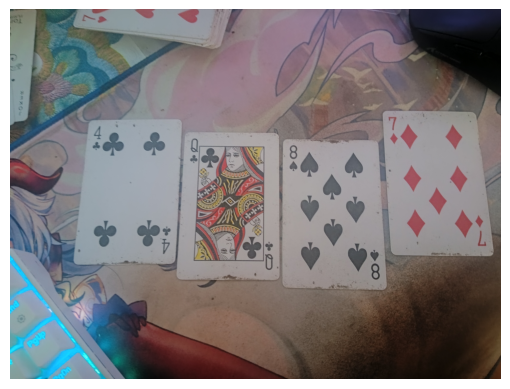

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display a sample prediction
image_path = '/content/IMG20241103115107.jpg'  # Replace with the path to a sample predicted image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
from ultralytics import YOLO

# Load the model with the trained weights
model = YOLO('/content/best.pt')


In [ ]:
# Path to the image you want to test
image_path = '/content/7diamond.jpg'  # Replace with the actual image path

# Run inference
results = model.predict(source=image_path, save=True, conf=0.25)



image 1/1 /content/7diamond.jpg: 224x160 (no detections), 36.6ms
Speed: 21.1ms preprocess, 36.6ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 160)
Results saved to runs/detect/predict2


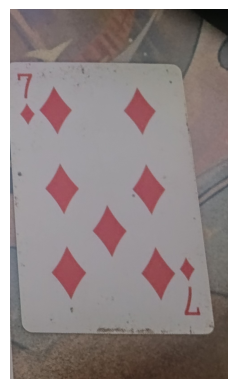

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the predicted image (the output will be in runs/predict/)
output_image_path = '/content/runs/detect/predict2/7diamond.jpg'
image = Image.open(output_image_path)
plt.imshow(image)
plt.axis('off')
plt.show()